In [14]:
from main import PororoOcr

def Image_ocr(path):
    ocr = PororoOcr()
    img_path = path
    ocr.run_ocr(img_path, debug=True)
    l = ocr.get_ocr_result()
    return l['description']

In [7]:
import os
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# 저장된 모델 불러오기
loaded_model = load_model("kumoh1.h5")

images = "../pred"

dir_name = [f for f in os.listdir(images)]

def predict(path):
    image_path = f"../pred/{path}"  # 예측하고자 하는 이미지의 경로를 입력하세요.
    img = image.load_img(image_path, target_size=(400, 400))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # 이미지를 [0, 1] 범위로 정규화
    # 모델에 입력 이미지 전달하여 예측 수행
    predictions = loaded_model.predict(img_array)

    # 예측 결과 출력
    predicted_class = np.argmax(predictions)

    predicted_label = dir_name[predicted_class]

    print(np.max(predictions))
    print(path , predicted_label)

    if predicted_label == "etc":
        l = Image_ocr(image_path)
        for i in l:
            if i.find("강의") != -1:
                print(i.split()[0])

In [8]:
predict("d1_2/d1_2_3.jpg")

1/1 [==============================] - 1s 875ms/step
0.7298263
d1_2/d1_2_3.jpg d1_2


1/1 [==============================] - 0s 154ms/step
0.59787726
etc/etc2.jpg etc


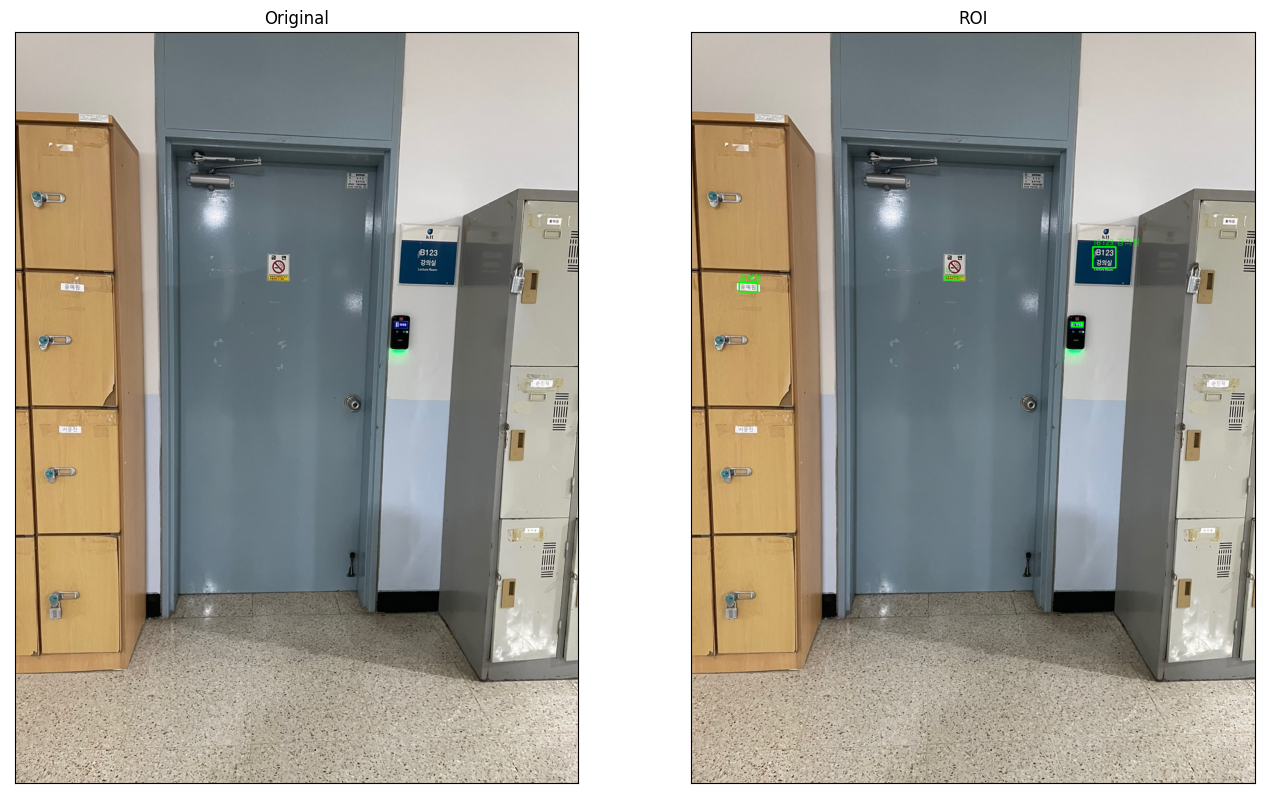

1B123


In [15]:
predict("etc/etc2.jpg")